## Group 24: Jaswanth Kranthi Boppana, Manav Mandal, Sayan Das, Vishnuvardhan Reddy Kollu

# Question 1

The contents of the files are as follows: 

**aggregateRockData.xlsx**

Contains the categorization and recognition data from the test phase of the experiment, aggregated by rock token. This data served as the primary target for formal modeling efforts. Column values:

* Rock number (See below)
* Category number (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary)
* Subtype number (See below)
* Token number (See below)
* Stimulus Type (1 = Non-parent training, 2 = Parent training, 3 = Standard transfer, 4 = HSN transfer)
* Frequency responded "Igneous"
* Frequency responded "Metamorphic"
* Frequency responded "Sedimentary"
* Frequency responded "Old"
* Frequency responded "New"
* Proportion responded "Igneous"
* Proportion responded "Metamorphic"
* Proportion responded "Sedimentary"
* Proportion responded "Old"

**norm540.txt**

Each row corresponds to one rock stimulus. Contains the normed (z-transformed) ratings of the stimuli on the 19 supplementary dimensions.

Column values:

* Rock number (See below)
* Subtype number (See below)
* Token number (See below)
* Porphyritic texture
* Presence of holes
* Salient green hue
* Pegmatitic texture
* Conchoidal fracture
* Angular fragments
* Rounded fragments
* Straight stripes
* Curved stripes
* Physical layers
* Veins
* Oily/shimmery texture
* Splotchy texture
* Single translucent crystal
* Multiple cubic crystals
* Sandy texture
* Fragments (disjunctive)
* Stripes (disjunctive)
* Crystals (disjunctive)

As per the given instructions we have created one csv file that  uses 2nd column from 'aggregateRockData.xlsx' that contains the rock category number (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary) - that will be the label and columns 4 to 22 - those will be the attributes (features) from 'norm540.txt'.


In [25]:
# writing all the import statements
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [26]:
# loading the dataset that is prepared
dataset=pd.read_csv("RockCatg_dataset.csv")
#dataset=pd.read_csv("RockCatg_dataset.csv")

# 1. Display the statistical values 
We display the statistical values and we find that there are no null values in the dataset. The description of the dataset exhibits varying scales across the attributes. So we use 'MinMaxScaler' to scale the dataset and ensure that the classifier later do not have any inherent bias.

Other than that we do not require any further special treatment as all atttributes are continuous data.

We have also plotted histograms and violin plots for various attributes. The histogram indicates that the data is right skewed.


In [27]:
#To understand the values in the dataset and checking if any necessary adjustments are needed.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Porphyritic texture         540 non-null    float64
 1   Presence of holes           540 non-null    float64
 2   Salient green hue           540 non-null    float64
 3   Pegmatitic texture          540 non-null    float64
 4   Conchoidal fracture         540 non-null    float64
 5   Angular fragments           540 non-null    float64
 6   Rounded fragments           540 non-null    float64
 7   Straight stripes            540 non-null    float64
 8   Curved stripes              540 non-null    float64
 9   Physical layers             540 non-null    float64
 10  Veins                       540 non-null    float64
 11  Oily                        540 non-null    float64
 12  Splotchy texture            540 non-null    float64
 13  Single translucent crystal  540 non

In [28]:
dataset.describe()
# this gives us the statstical values of the dataset.

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals,Category
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,540.000000
mean,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07,2.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,0.817254
min,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,1.000000
25%,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,1.000000
50%,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,2.000000
75%,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01,3.000000
max,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00,3.000000


In [29]:
#performing the min max scaling to get data b/w 0 and 1 so that data and histogram looks to be organized
from sklearn.preprocessing import MinMaxScaler
dataset_temp=dataset.copy()
dataset_temp.drop(["Category"],axis=1,inplace = True)
# Sample data
data = dataset_temp
# Create a Min-Max scaler
scaler = MinMaxScaler()
# Fit the scaler to your data
scaler.fit(data)
# Transform your data using the scaler
scaled_data = scaler.transform(data)
# The scaled_data now contains your Min-Max scaled values
# Create a pandas DataFrame
column_names = ['Porphyritic texture','Presence of holes','Salient green hue','Pegmatitic texture','Conchoidal fracture','Angular fragments','Rounded fragments','Straight stripes',
'Curved stripes','Physical layers','Veins','Oily','Splotchy texture','Single translucent crystal','Multiple cubic crystals','Sandy texture',
'Fragments','Stripes','Crystals']
# Replace with your actual feature names
dataset_nc=pd.DataFrame(scaled_data)
dataset_st = pd.DataFrame(scaled_data,columns=column_names)
# Display the DataFrame
dataset_st.head()

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
0,0.804521,0.05,0.137580,0.194723,0.126103,0.20,0.15,0.0,0.0,0.000000,0.055556,0.0,0.315790,0.0,0.00,0.10,0.3200,0.0,0.00
1,0.804521,0.05,0.166879,0.263819,0.151324,0.65,0.15,0.0,0.0,0.052632,0.000000,0.0,0.105263,0.0,0.05,0.05,0.7025,0.0,0.05
2,0.797872,0.00,0.519745,0.125628,0.158890,0.60,0.00,0.0,0.0,0.052632,0.000000,0.0,0.368421,0.0,0.00,0.05,0.6000,0.0,0.00
3,0.949468,0.00,0.196178,0.163316,0.025221,0.10,0.85,0.0,0.0,0.052632,0.000000,0.0,0.105263,0.0,0.00,0.10,0.8650,0.0,0.00
4,0.944149,0.05,0.588535,0.232412,0.032787,0.35,0.80,0.0,0.0,0.000000,0.000000,0.0,0.105263,0.0,0.00,0.05,0.8700,0.0,0.00


In [30]:
#Adding back the target label to the dataset
dataset_st['Category']=dataset['Category']
dataset_st.head()

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals,Category
0,0.804521,0.05,0.137580,0.194723,0.126103,0.20,0.15,0.0,0.0,0.000000,0.055556,0.0,0.315790,0.0,0.00,0.10,0.3200,0.0,0.00,1
1,0.804521,0.05,0.166879,0.263819,0.151324,0.65,0.15,0.0,0.0,0.052632,0.000000,0.0,0.105263,0.0,0.05,0.05,0.7025,0.0,0.05,1
2,0.797872,0.00,0.519745,0.125628,0.158890,0.60,0.00,0.0,0.0,0.052632,0.000000,0.0,0.368421,0.0,0.00,0.05,0.6000,0.0,0.00,1
3,0.949468,0.00,0.196178,0.163316,0.025221,0.10,0.85,0.0,0.0,0.052632,0.000000,0.0,0.105263,0.0,0.00,0.10,0.8650,0.0,0.00,1
4,0.944149,0.05,0.588535,0.232412,0.032787,0.35,0.80,0.0,0.0,0.000000,0.000000,0.0,0.105263,0.0,0.00,0.05,0.8700,0.0,0.00,1


In [31]:
dataset_st.describe()

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals,Category
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.352982,0.082204,0.301637,0.240555,0.246590,0.085833,0.077870,0.067232,0.042500,0.173730,0.057099,0.144264,0.149123,0.031019,0.027407,0.120419,0.147167,0.101325,0.056162,2.000000
std,0.267109,0.201666,0.253914,0.181864,0.197587,0.196864,0.192185,0.190791,0.163321,0.228855,0.111486,0.266833,0.176084,0.136093,0.121786,0.175554,0.271831,0.247588,0.180923,0.817254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.132979,0.000000,0.108280,0.094221,0.108449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272606,0.000000,0.206369,0.207286,0.192938,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,2.000000
75%,0.557181,0.050000,0.450000,0.345477,0.317150,0.050000,0.050000,0.000000,0.000000,0.263158,0.055556,0.100000,0.210526,0.000000,0.000000,0.150000,0.150000,0.050000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single translucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments'}>,
        <Axes: title={'center': 'Stripes'}>,
        <Axes: title={'center': 'Crystal

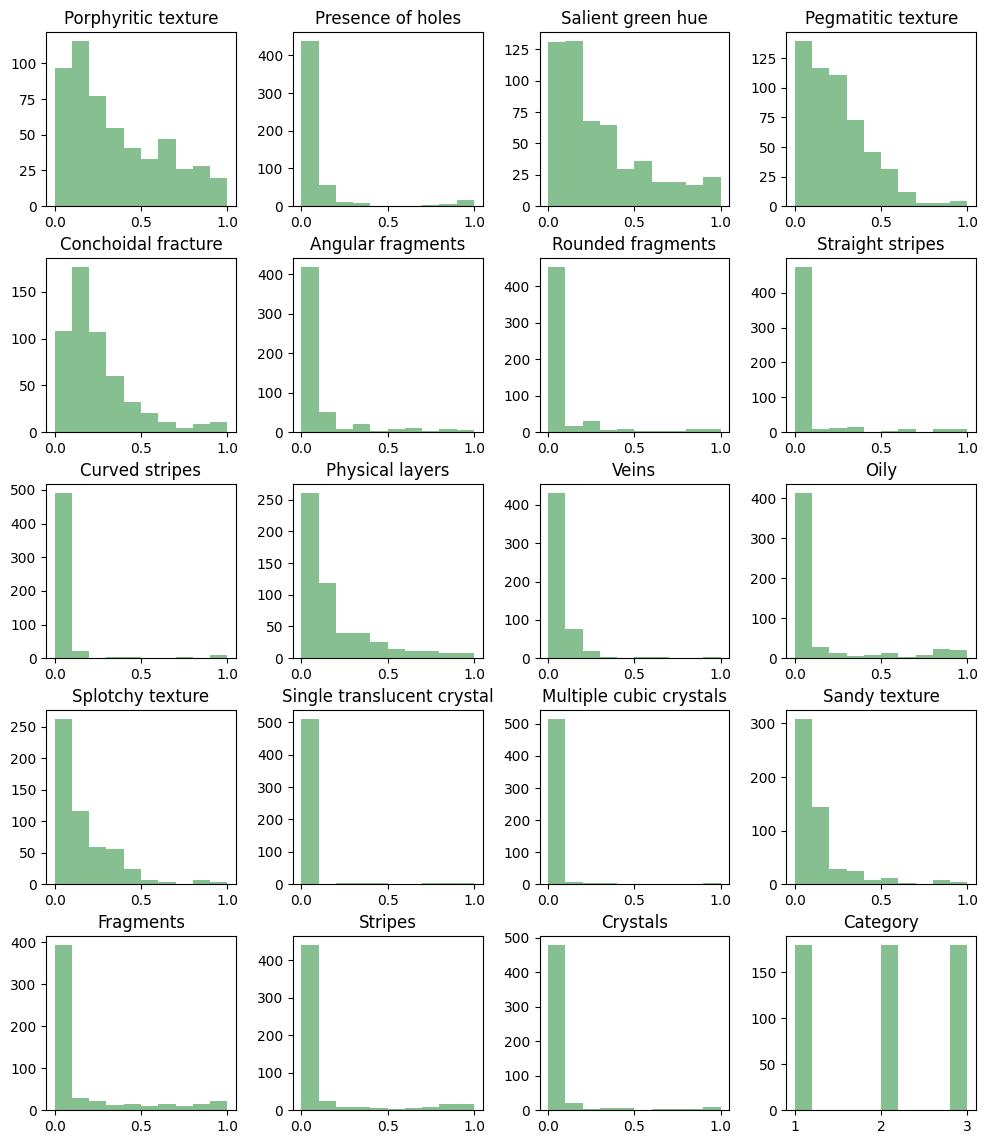

In [32]:
dataset_st.hist(figsize=(12,14),grid=False,color='#86bf90')

<Axes: >

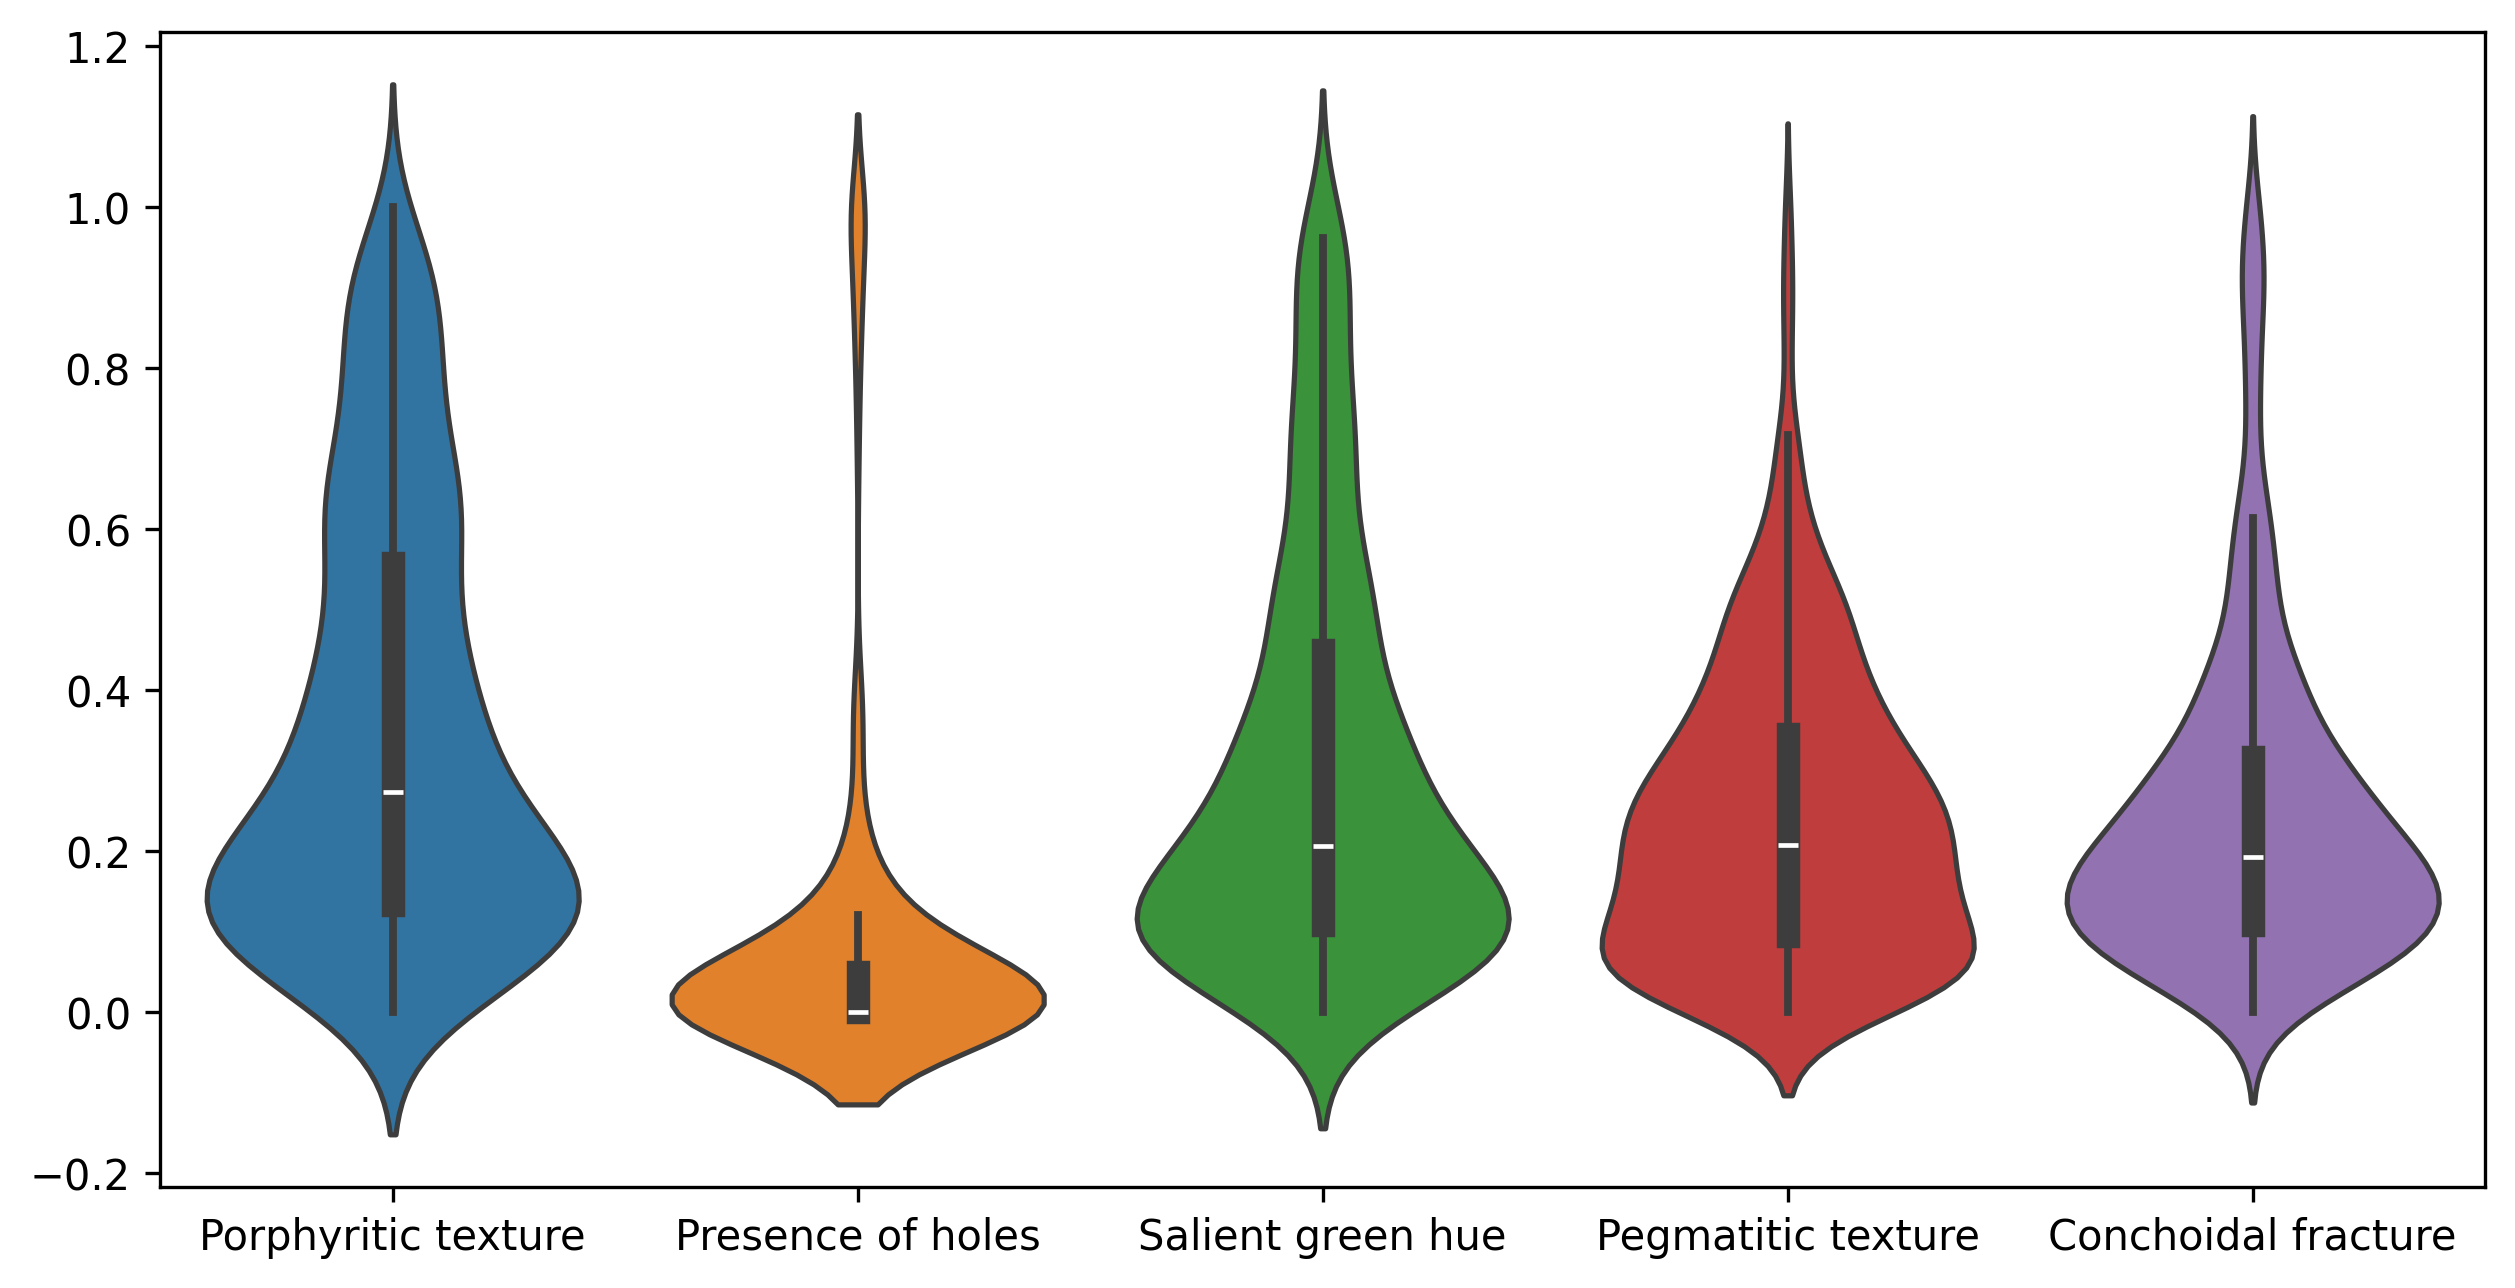

In [33]:
#Apart from histogram the data distribution with respect to each variable can be represented using box or violin plots
import seaborn as se
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=300)
se.violinplot(dataset_st[['Porphyritic texture','Presence of holes','Salient green hue','Pegmatitic texture','Conchoidal fracture',]])
# plots of all other can also be incuded later.

# 2 .Analyze and discuss the relationships between the data attributes

To understand the correlation between various attributes, we compute the Pearson Correlation Coefficient (PCC), generate scatter plots & also generate the corresponding heatmap. The detailed analysis has been presented after the heatmap.


In [34]:
# the data is scaled to be viewed with ease and proper ultimate perspectives can be delivered.
# the follwoing is the chunck of data we have
dataset_st.describe()

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals,Category
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.352982,0.082204,0.301637,0.240555,0.246590,0.085833,0.077870,0.067232,0.042500,0.173730,0.057099,0.144264,0.149123,0.031019,0.027407,0.120419,0.147167,0.101325,0.056162,2.000000
std,0.267109,0.201666,0.253914,0.181864,0.197587,0.196864,0.192185,0.190791,0.163321,0.228855,0.111486,0.266833,0.176084,0.136093,0.121786,0.175554,0.271831,0.247588,0.180923,0.817254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.132979,0.000000,0.108280,0.094221,0.108449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272606,0.000000,0.206369,0.207286,0.192938,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,2.000000
75%,0.557181,0.050000,0.450000,0.345477,0.317150,0.050000,0.050000,0.000000,0.000000,0.263158,0.055556,0.100000,0.210526,0.000000,0.000000,0.150000,0.150000,0.050000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


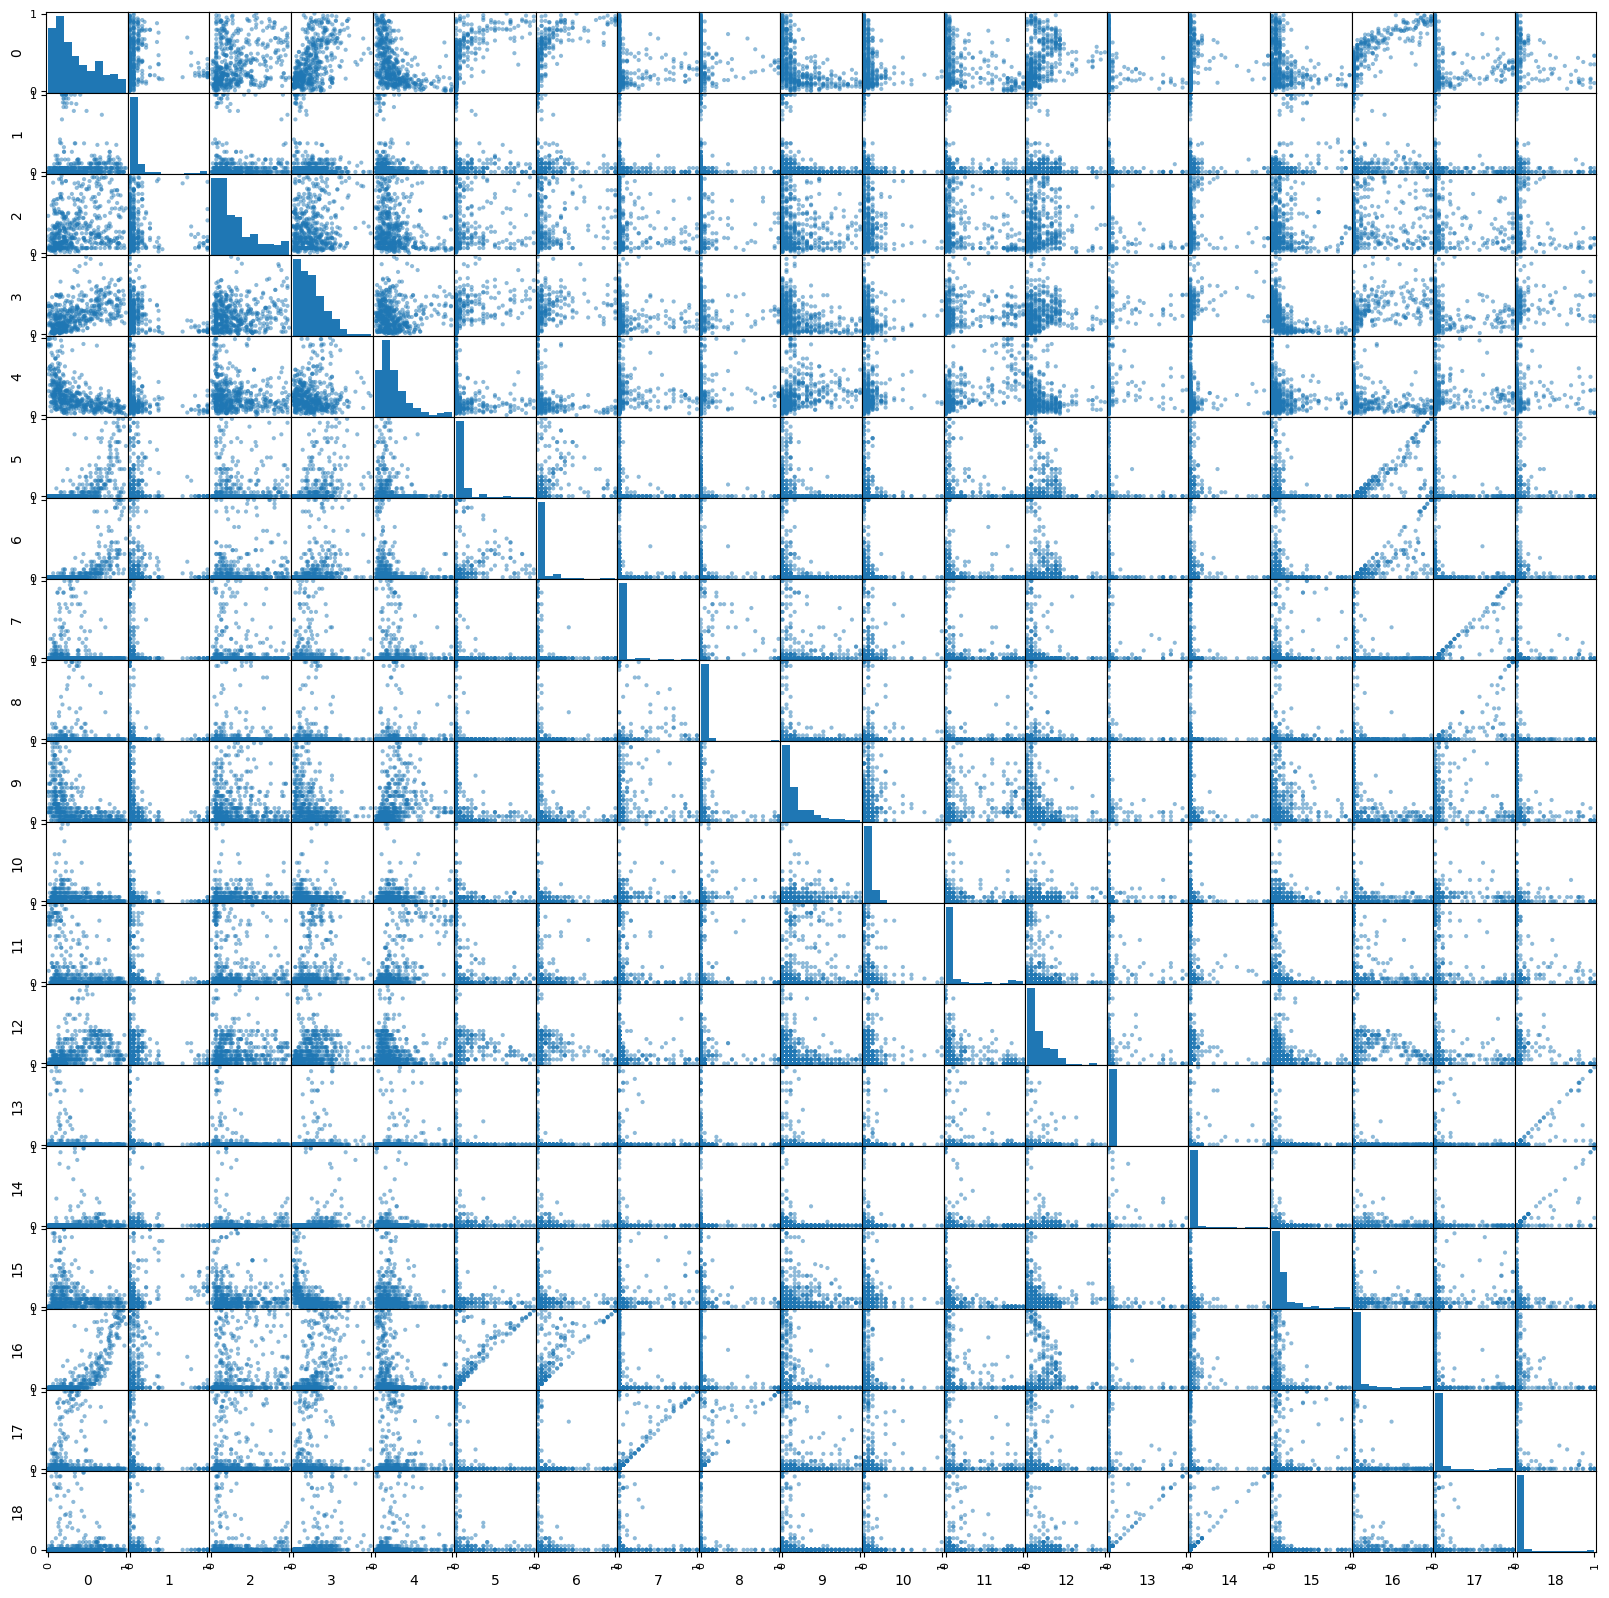

In [35]:
from numpy import matrix
# to understand the relation between one feature and other  we need to check the corelation by using pcc and by ploting the correlation matrix
# Pearson Correlation Coefficient (PCC)
corr_matrix = dataset_st.corr()
# scatter plots
pd.plotting.scatter_matrix(dataset_nc, figsize=(20, 20), diagonal='hist')
plt.show()


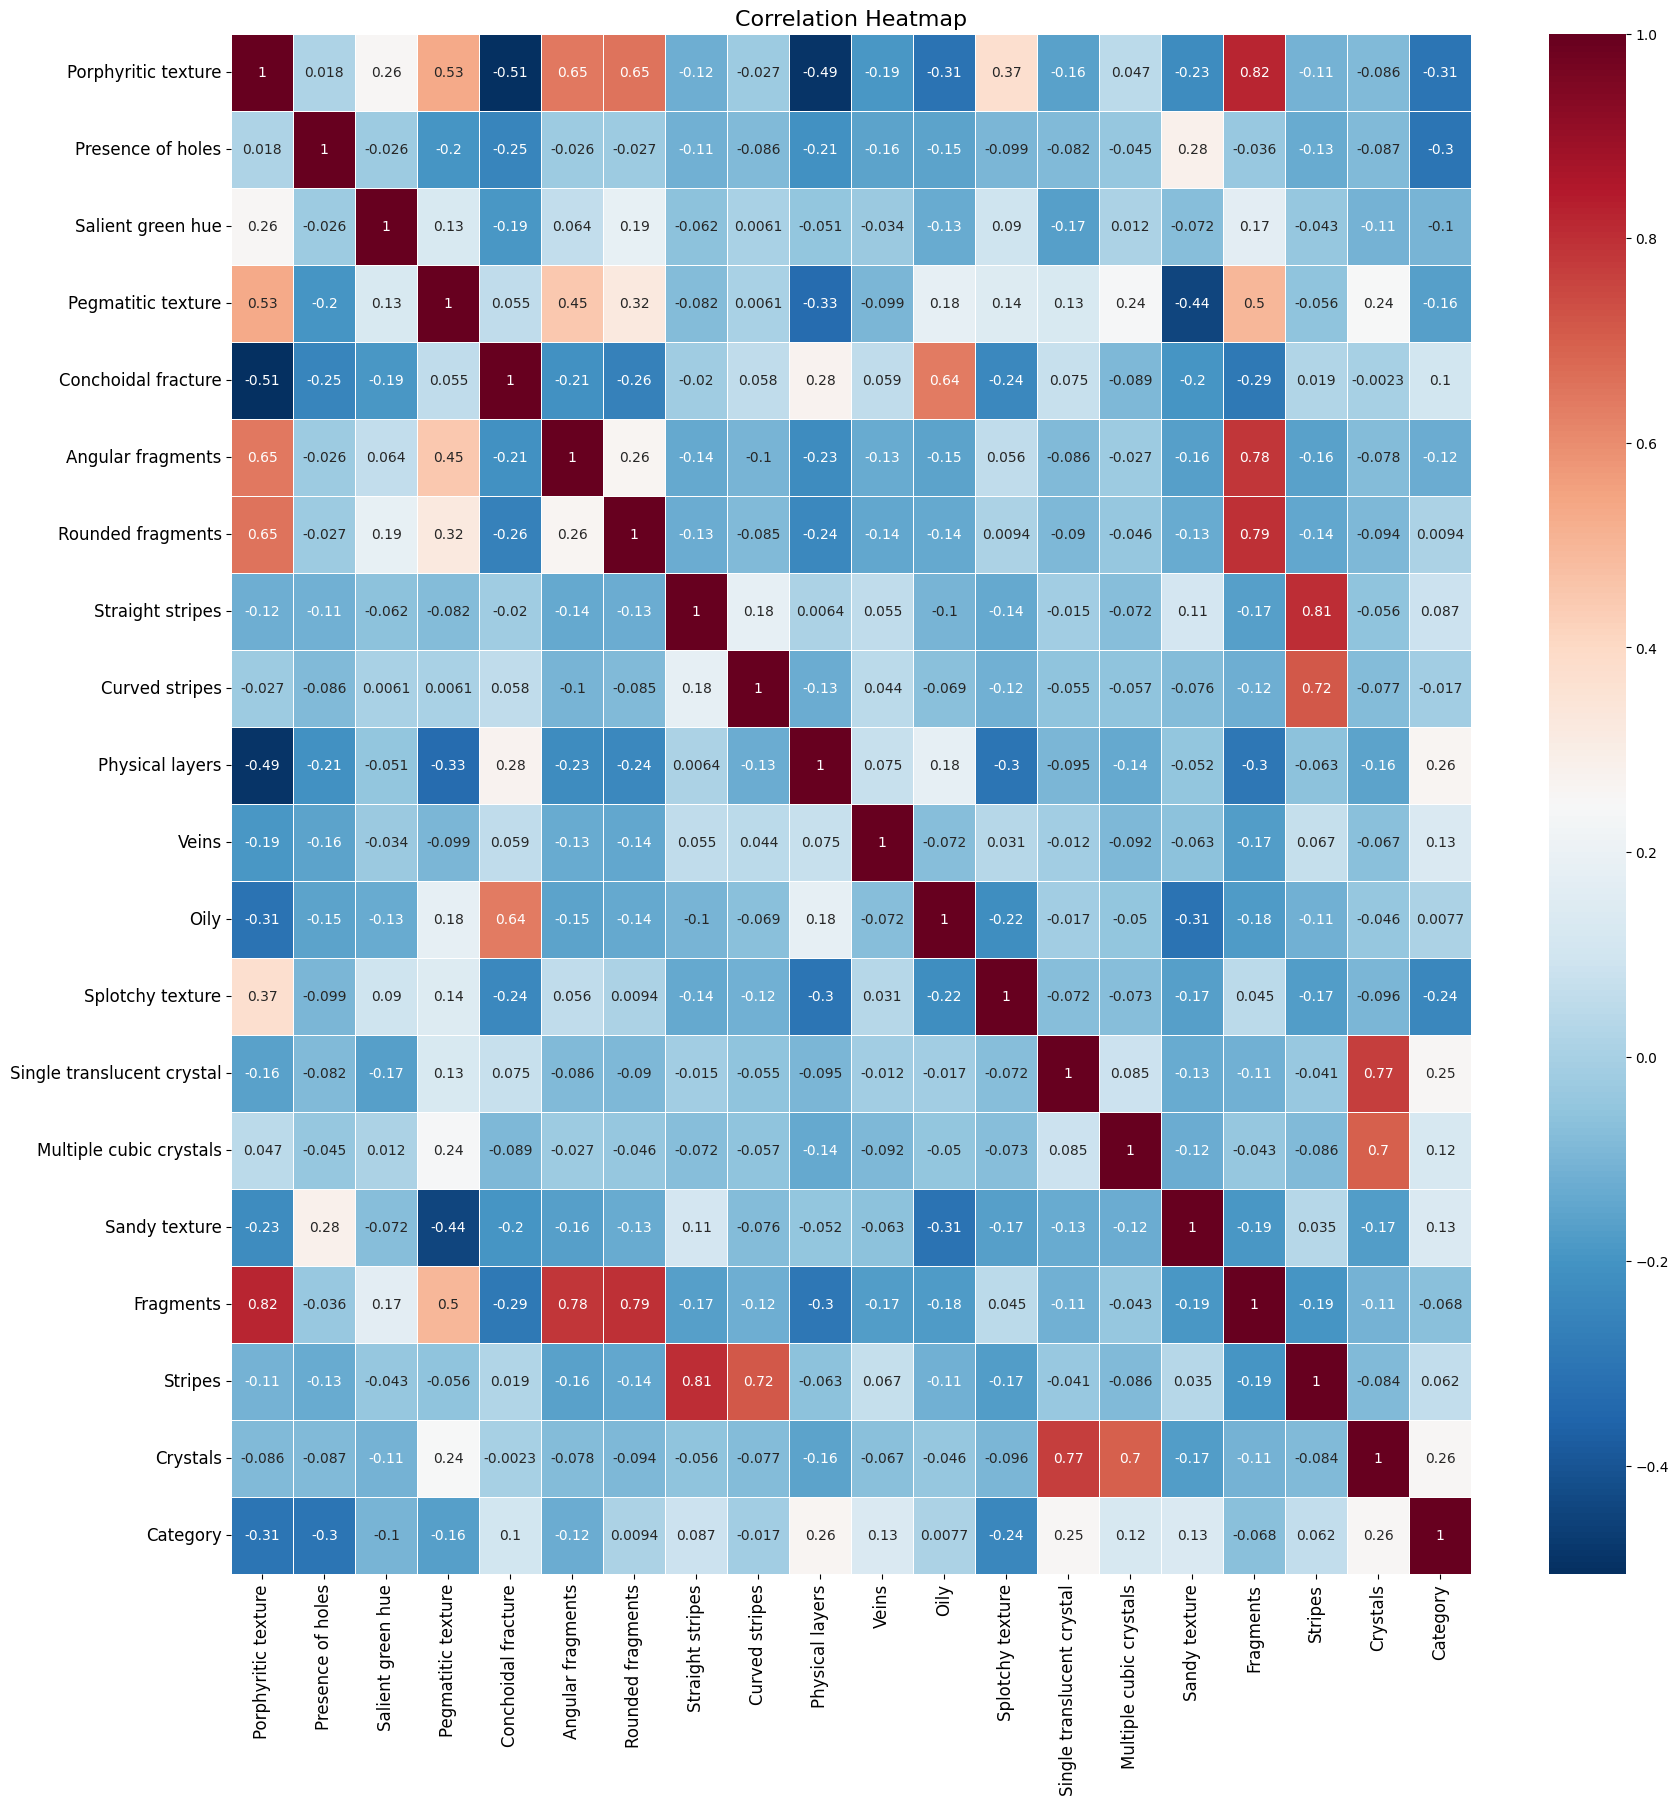

In [36]:
import seaborn as sb
import matplotlib.pyplot as plt
corr = dataset_st.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We observe moderate to strong positive correlation (> 0.5) among the following attributes:

* Porphyritic & pegmatic texture (0.53).
* Porphyritic texture and angular fragments (0.65) and rounded fragments (0.65)
* Porphyritic and rock fragment type (0.82).
* Angular fragments and rock fragments (0.78)
* Rounded fragments and rock fragments (0.79)
* Straight (0.81) and curved (0.72) stripes with rock stripes
* Oil and Conchoidal fracture (0.64)
* Single translucent crystals (0.77) and multiple cubic crystals (0.7) with crystals

We observe moderate to strong negative correlation (> 0.2) among the following attributes:

* Porphyritic and conchoidal fracture (-0.51)
* Porphyritic and oily (-0.31)
* Presence of holes with pegmatic texture (-0.2) and conchoidal fracture (-0.25)
* Presence of holes with physical layers (-0.21)
* Pegmatic texture and physical layers (-0.33) 
* Pegmatic and sandy texture (-0.44)
* Conchoidal with angular (-0.21) and rounded (-0.26) fragments, & rock fragments (-0.29)
* Conchoidal with splotchy (-0.24) and sandy (-0.2) texture
* Angular (-0.23) and rounded (-0.24) fragments with physical layers
* Oily with splotchy (-0.22) and sandy (-0.31) texture

These patterns of correlation will play an important part in the model’s capacity of predicting correct classification.

# 3. Train Test Split

We use the train_test_split module from sklearn to split the dataset into 2 parts; 20% for testing and 80% for training. We then use train_test_split again to create 20% validation set. We also specify the parameter 'stratify' that splits the data based on the distribution of our target variable.
This is verified by the next cell that shows that each category of our target gets equally distributed and is representative.

From the histograms given below it is clear that the train, validation and testing dataframes is similar to the original distribution of our dataset from the previous steps.

In [37]:
from numpy.random import triangular
# we have to perform the STATA method or the stratified sampling technique to split the data.
from sklearn.model_selection import train_test_split
dataset_X=dataset_st.copy()
dataset_X.head()
dataset_X.drop(['Category'],axis=1,inplace = True)
dataset_Y=dataset_st['Category']
x_main,x_test,y_main,y_test=train_test_split(dataset_X,dataset_Y,test_size=0.2,stratify=dataset_Y)
x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=0.2,stratify=y_main)


In [38]:
y_test.value_counts()/len(y_test)
# every part of the data is equally splited in the test set

Category
1    0.333333
2    0.333333
3    0.333333
Name: count, dtype: float64

([<matplotlib.axis.XTick at 0x1500c549990>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

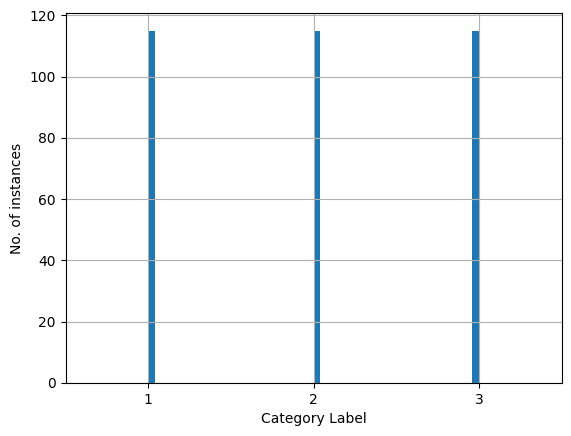

In [39]:
plt.figure()
y_train.hist(bins=50)
plt.xlabel('Category Label')
plt.ylabel('No. of instances')
plt.xlim([0.5,3.5])
plt.xticks([1,2,3])

([<matplotlib.axis.XTick at 0x1500c5f9c50>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

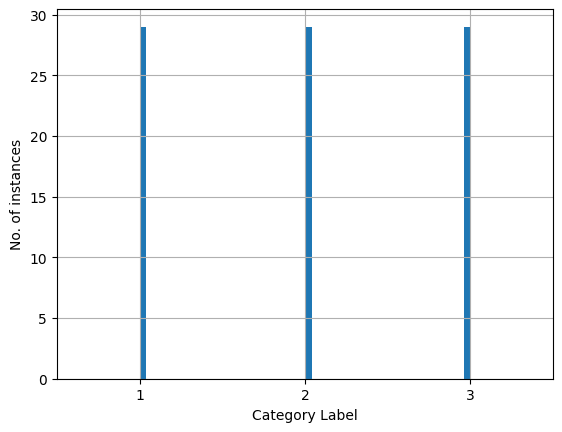

In [40]:
plt.figure()
y_val.hist(bins=50)
plt.xlabel('Category Label')
plt.ylabel('No. of instances')
plt.xlim([0.5,3.5])
plt.xticks([1,2,3])

([<matplotlib.axis.XTick at 0x1500d356710>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

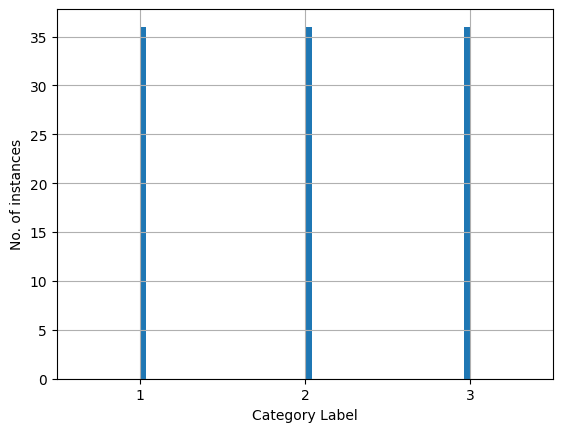

In [41]:
plt.figure()
y_test.hist(bins=50)
plt.xlabel('Category Label')
plt.ylabel('No. of instances')
plt.xlim([0.5,3.5])
plt.xticks([1,2,3])

# 4 Training different classifiers

We first define a function that plots the the training and validation loss. This is followed by 

    Multinomial Logistic Regression (softmax regression)

    Support vector machines 

    Random Forest classifier
    
To report the performance of the model on training and validation set we generate the loss curves. Then we print the f1 score from the application of the model on the test set.


In [42]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
def plot_learning_curves(model, X, y, epochs=100):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for epoch in range(1, epochs + 1):
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(f1_score(y_train, y_train_predict, average='macro'))
        val_errors.append(f1_score(y_val, y_val_predict, average='macro'))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Epochs")
    plt.ylabel("accuracy_score")
    plt.legend()
    plt.show()

In [43]:
#Performing a grid search to find the optimal hyperparameters for a logistic regression classifier
import warnings
warnings.filterwarnings('ignore')
param_grid = [{'C': [0.001, 0.01,1.01, 1, 10],'penalty': ['l2','l1'],'solver': ['lbfgs','saga'], 'max_iter': [50, 100, 150, 200]}]

softmax_reg = LogisticRegression(multi_class="multinomial")
grid_search_LR = GridSearchCV(softmax_reg, param_grid, cv=10,return_train_score=True,n_jobs=-1)
grid_search_LR.fit(x_main, y_main)
grid_search_LR.best_params_

{'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

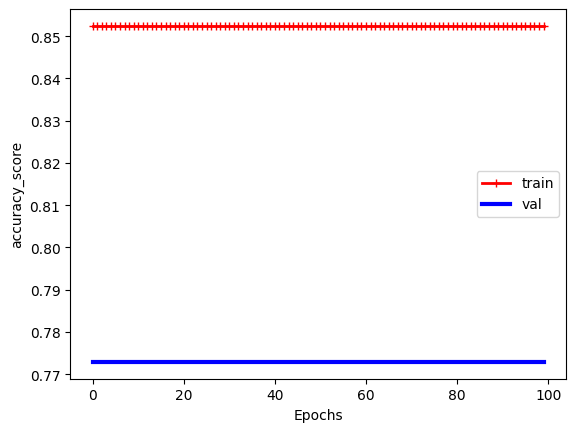

In [44]:
#softmax_reg = LogisticRegression(multi_class="multinomial",solver="saga", penalty='l1', C=1.01 , max_iter=100)
#plot_learning_curves(LogisticRegression(multi_class="multinomial",solver="saga", penalty='l1', C=1.01 , max_iter=100),x_main,y_main)
plot_learning_curves(LogisticRegression(multi_class="multinomial",solver=grid_search_LR.best_params_['solver'], penalty=grid_search_LR.best_params_['penalty'], C=grid_search_LR.best_params_['C'] , max_iter=100, random_state=123),x_main,y_main)

The above graph represents the training and validation loss. We now evaluate our best model on the test set.

In [45]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver=grid_search_LR.best_params_['solver'], penalty=grid_search_LR.best_params_['penalty'], C=grid_search_LR.best_params_['C'] , max_iter=100)
softmax_reg.fit(x_main, y_main)
print(cross_val_score(softmax_reg, x_main, y_main, cv=3, scoring="accuracy"))
y_pred=softmax_reg.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred,average='macro'))
print("Recall : ",recall_score(y_test, y_pred,average='macro'))
print("f1 score : ", f1_score(y_test, y_pred, average='macro'))

[0.73611111 0.6875     0.625     ]
Accuracy Score :  0.8055555555555556
Precision Score :  0.8072474388263862
Recall :  0.8055555555555555
f1 score :  0.8056418538848558


We explore various parameters such as C, solver and max number of iterations. The best softmax model has the following parameters

{'C': 10, 'penalty': 'l1', 'solver': 'saga' 'max_iter': 200}

We get the following results from using the best model on our test data:

    Accuracy Score :  0.8055555555555556
    Precision Score :  0.8072474388263862
    Recall :  0.8055555555555555
    f1 score :  0.8056418538848558

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf','poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True)

In [48]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [49]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [50]:
bestSVC = SVC(C = grid.best_params_['C'], gamma= grid.best_params_['gamma'], kernel = grid.best_params_['kernel'])
bestSVC.fit(x_train, y_train)

SVC(C=10, gamma=1)

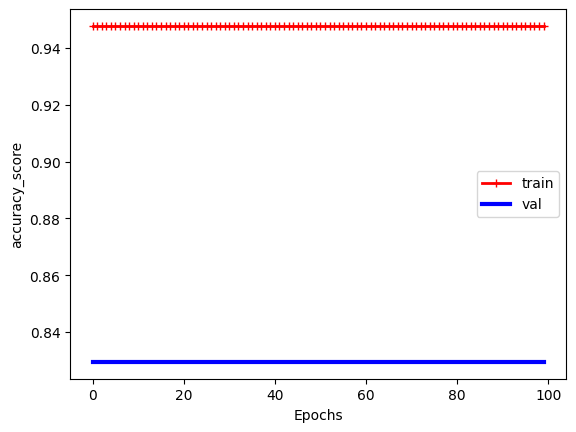

In [51]:
plot_learning_curves(SVC(C = grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel = grid.best_params_['kernel']),x_main,y_main)

The above graph represents the training and validation loss. We now evaluate our best model on the test set.

In [52]:
y_pred=bestSVC.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred,average='macro'))
print("Recall : ",recall_score(y_test, y_pred,average='macro'))
print("f1 score : ", f1_score(y_test, y_pred, average='macro'))

Accuracy Score :  0.7592592592592593
Precision Score :  0.7601744601744601
Recall :  0.7592592592592592
f1 score :  0.7596165526900623


We explore various parameters such as C, kernel, degree of polynomial kernel, gamma. The best SVC model has the following parameters

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

We get the following results from using the best model on our test data:

    Accuracy Score :  0.7592592592592593
    Precision Score :  0.7601744601744601
    Recall :  0.7592592592592592
    f1 score :  0.7596165526900623
    

In [53]:
# RANDOM FOREST

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()


# Define hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 210, 225, 240, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4, 6]#,
    #'bootstrap': [True, False]
}

# Use stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Best Hyperparameters:', grid_search.best_params_)
print("f1 score : ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7962962962962963
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
f1 score :  0.7987337765115542


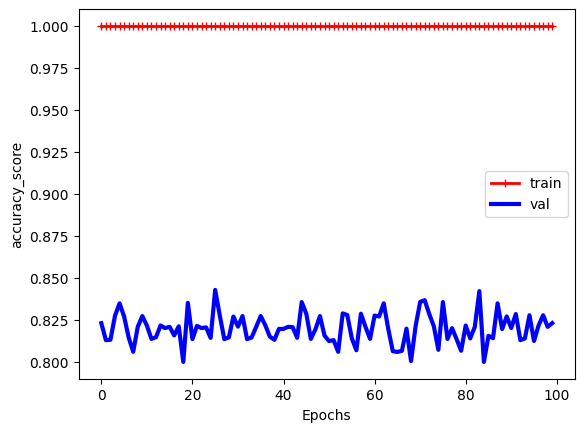

In [54]:
plot_learning_curves(RandomForestClassifier(max_depth= grid_search.best_params_['max_depth'], min_samples_leaf= grid_search.best_params_['min_samples_leaf'], min_samples_split= grid_search.best_params_['min_samples_split'], n_estimators= grid_search.best_params_['n_estimators']),x_main,y_main)

The above graph represents the training and validation loss. We now evaluate our best model on the test set.

In [55]:
print("Precision Score : ", precision_score(y_test, y_pred,average='macro'))
print("Recall : ",recall_score(y_test, y_pred,average='macro'))
print("f1 score : ", f1_score(y_test, y_pred, average='macro'))

Precision Score :  0.8144842611374052
Recall :  0.7962962962962963
f1 score :  0.7987337765115542


In [56]:
# Calculate and display feature importance
feature_importance = best_rf_classifier.feature_importances_
feature_names = x_train.columns

# Create a DataFrame to display the feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(importance_df)

Feature Importance:
                       Feature  Importance
0          Porphyritic texture    0.114110
4          Conchoidal fracture    0.095198
2            Salient green hue    0.079415
15               Sandy texture    0.074598
9              Physical layers    0.074208
3           Pegmatitic texture    0.073797
12            Splotchy texture    0.065228
1            Presence of holes    0.062621
16                   Fragments    0.062064
11                        Oily    0.054328
6            Rounded fragments    0.037786
10                       Veins    0.036577
17                     Stripes    0.036136
18                    Crystals    0.033454
5            Angular fragments    0.033295
7             Straight stripes    0.020909
13  Single translucent crystal    0.019541
8               Curved stripes    0.016123
14     Multiple cubic crystals    0.010613


We explore various parameters such as the number of trees, max depth, the minimum number of samples required to split an internal node and the minimum number of samples required to be at a leaf node. The best random forest model has the following parameters

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}

We get the following results from using the best model on our test data:

    Precision Score :  0.8144842611374052
    Recall :  0.7962962962962963
    f1 score :  0.7987337765115542


The feature importace section shows us that:
* Porphyritic texture has the highest importance in rock type classification followed closely by conchoidal fracture. This is understandable as they are unique features found in special type of rocks.
* The color and texture attributes (Salient green hue, Sandy texture, Physical layers, Pegmatitic texture, Splotchy texture, Presence of holes, Fragments, Oily) fall in the next most important set of features.


# 5. Combine your classifiers into an ensemble

Random forest is the only model among the three models that manages to get an f1 score above 80. In the following cells we use stacking and voting classifiers to verify whether the over accuracy improves with all three models combined.

In [57]:
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(
estimators=[
('lr', LogisticRegression(multi_class="multinomial",solver=grid_search_LR.best_params_['solver'], penalty=grid_search_LR.best_params_['penalty'], C=grid_search_LR.best_params_['C'])),
('rf', RandomForestClassifier(max_depth= grid_search.best_params_['max_depth'], min_samples_leaf= grid_search.best_params_['min_samples_leaf'], min_samples_split= grid_search.best_params_['min_samples_split'], n_estimators= grid_search.best_params_['n_estimators'], random_state=42)),
('svc', SVC(C = grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel = grid.best_params_['kernel'], probability=True, random_state=42))
],
final_estimator=RandomForestClassifier(random_state=43),
cv=5 # number of cross-validation folds
)
stacking_clf.fit(x_train, y_train)

y_pred = stacking_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision Score : ", precision_score(y_test, y_pred,average='macro'))
print("Recall : ",recall_score(y_test, y_pred,average='macro'))
print("f1 score : ", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.8148148148148148
Precision Score :  0.8144644644644646
Recall :  0.8148148148148149
f1 score :  0.8145343394716344


After using Stacking we can see that the f1 score goes up. The new score is 81.45% which is better than our best performing individual model (Logistic regression: 80.56%).

In the next cell we run Voting Classifiers and check if soft voting or hard voting gives better results.

In [58]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators=[
('lr', LogisticRegression(multi_class="multinomial",solver=grid_search_LR.best_params_['solver'], penalty=grid_search_LR.best_params_['penalty'], C=grid_search_LR.best_params_['C'])),
('rf', RandomForestClassifier(max_depth= grid_search.best_params_['max_depth'], min_samples_leaf= grid_search.best_params_['min_samples_leaf'], min_samples_split= grid_search.best_params_['min_samples_split'], n_estimators= grid_search.best_params_['n_estimators'], random_state=42)),
('svc', SVC(C = grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel = grid.best_params_['kernel'], probability=True, random_state=42))
]
)
voting_clf.fit(x_train, y_train)

y_pred = voting_clf.predict(x_test)

# Calculate accuracy
print('Hard voting classifier: ')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision Score : ", precision_score(y_test, y_pred,average='macro'))
print("Recall : ",recall_score(y_test, y_pred,average='macro'))
print("f1 score : ", f1_score(y_test, y_pred, average='macro'))



Hard voting classifier: 
Accuracy: 0.8333333333333334
Precision Score :  0.8346581875993642
Recall :  0.8333333333333334
f1 score :  0.8336594911937377


The default value for voting is 'Hard' and we see a classification score of 83.36% which is higher than our stacking score.

In [59]:
voting_clf.voting = "soft"
voting_clf.fit(x_train, y_train)
#voting_clf.score(x_test, y_test)

y_pred = voting_clf.predict(x_test)

# Calculate accuracy
print('Soft voting classifier: ')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision Score : ", precision_score(y_test, y_pred,average='macro'))
print("Recall : ",recall_score(y_test, y_pred,average='macro'))
print("f1 score : ", f1_score(y_test, y_pred, average='macro'))

Soft voting classifier: 
Accuracy: 0.8425925925925926
Precision Score :  0.8435322847087553
Recall :  0.8425925925925926
f1 score :  0.8423250614799911


With 'Soft' voting we get a f1 score of 84.23% which is the highest score we get. 

# Conclusion:



The final f1 score for our classifers are as follows:

* Softmax Regression: 0.8056
* SVC classifier: 0.7596
* Random Forest: 0.7987
* Stacking Classifier: 0.8145
* Voting Classifier(hard): 0.8337
* Voting Classifier(soft): 0.8423

Based on these values, Ensemble methods such as Stacking and Voting classifiers improve the f1 score of the individual classifiers, with Soft Voting classifier reporting the highest score of 84.23%. 